
# Project 9 - Introduction to Natural Language Processing - Twitter US Airline Sentiment 

#### By   : Rakesh Jyothi Krishnan
#### Batch: PGP - ARTIFICIAL INTELLIGENCE & MACHINE LEARNING . PGP-AIML-BA-UTA-Sept'21-A
#### Date : 05/27/2022
---

# Description

## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.


## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 
## Dataset:

The dataset has the following columns:

1) tweet_id                                                           
2) airline_sentiment                                               
3) airline_sentiment_confidence                               
4) negativereason                                                   
5) negativereason_confidence                                    
6) airline                                                                    
7) airline_sentiment_gold                                              
8) name    
9) negativereason_gold    
10) retweet_count     
11) text    
12) tweet_coord    
13) tweet_created    
14) tweet_location     
15) user_timezone    
 

## Objective:

To implement the techniques learned as a part of the course.


## Learning Outcomes:

- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model



## EDA and Text Preprocessing


* Aim approach & method in a structured manner and the exploratory data analytics (EDA) steps plays a huge part in it. It is also true for text data in NLP.

* Inconsistent results from the NLP applications can be minimized by use of right kind of preprocessing on text corpus. 

* One type of pre-processing may not be suitable for other, so it's task dependent.

* Let’s say you are trying to discover commonly used words in a news dataset. If your pre-processing step involves removing stop words because some other task used it, then you are probably going to miss out on some of the common words as you have ALREADY eliminated it. So really, it’s not a one-size-fits-all approach.

## Data Set Information & Context:


- The data has got Content , Date, Number of Retweet, column of the tweets.
- The data has got  pre labelled sentiment(positive, negative and neutral) column for each content of tweets.
- We will be  exploring and analyzing  relevant columns of the data.
- We will be applying all necessary text pre processing steps on content column of the tweet data.



## Steps:

- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers, 
stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- Build Machine Learning Model for Text Classification
    1. **Supervised models** - Some popular techniques used for encoding text:  
        -**Bag of Words (CountVectorizer)**   
        -**TF-IDF** (**T**erm  **F**requency - **I**nverse **D**ocument **F**requency)

    2. **Unsupervised models** - Some popular techniques used for unsupervised Sentiment Analysis:       
        -**TextBlob**         
        -**VADER Sentiment**


- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary



### Table of Contents

1. <a href='#1. Import  Libraries'>Import  Libraries</a>

2. <a href='#2. Load Data'>Load Data</a>

3. <a href='#3. Overview of Data'>Overview of Data</a>
 
4. <a href='#4. Exploratory Data Analysis'>Exploratory Data Analysis</a>

5. <a href='#5. Understanding of Data Columns'>Understanding of Data Columns</a>
    
6. <a href='#6. Data Preprocessing'>Data Preprocessing</a>

7. <a href='#7. Vectorization'>Vectorization, Modeling, Cross-Validation, and Evaluation</a>

8. <a href='#8. Conclusion and key takeaways'>Conclusion and key takeaways</a>


### 1. Import  Libraries <a id='1. Import  Libraries'></a>

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warning messages
import warnings

warnings.filterwarnings("ignore")

# to set background color in plots
sns.set(color_codes=True)

# to print plots inline
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Import os
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# Import random for seed setting
import random

random.seed(1)
np.random.seed(1)
# tf.random.set_seed(1)

# Import Regex, string and unicodedata
import re, string, unicodedata

# Import contractions library
import contractions

# Import BeautifulSoup
from bs4 import BeautifulSoup

# Downloading nltk corpus
import nltk

nltk.download("stopwords")

# Import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Import tokenizer
from nltk.tokenize import word_tokenize

# Import Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download("wordnet")

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import train and test split
from sklearn.model_selection import train_test_split

# Import Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import Classification report
from sklearn.metrics import classification_report

# Import cross validation and KFold validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# To get diferent metric scores
from sklearn import metrics

# To tune different models
from sklearn.model_selection import GridSearchCV

# Download VADER lexicon
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import TextBlob
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakeshjyothikrishnan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rakeshjyothikrishnan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rakeshjyothikrishnan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<IPython.core.display.Javascript object>

### 2. Load Data <a id='2. Load Data'></a>

In [2]:
# Read data from csv file using pandas and create DataFrame object as Analytic Base Table
tweets_data_ABT = pd.read_csv("Tweets.csv")

<IPython.core.display.Javascript object>

In [3]:
# Make a copy of Analytic Base Table for further analysis and model building
tweets_data = tweets_data_ABT.copy()

<IPython.core.display.Javascript object>

### 3. View Data <a id='3. View Data'></a>

In [4]:
# checking number of columns and rows
print(f"There are {tweets_data.shape[0]} rows and {tweets_data.shape[1]} columns.")

There are 14640 rows and 15 columns.


<IPython.core.display.Javascript object>

In [5]:
# Check datatypes of each columns
tweets_data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

<IPython.core.display.Javascript object>

#### Observation : 
1. Column names and its data types are listed
2. Columns 'tweet_id', 'airline_sentiment_confidence', 'negativereason_confidence' and 'retweet_count' are integer data type
3. Columns 'airline_sentiment', 'negativereason', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'text', 'tweet_coord', 'tweet_created', 'tweet_location' and 'user_timezone' are object datatypes.

In [6]:
# Additional check on data for null values
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<IPython.core.display.Javascript object>

#### Observation : 
1. Row index is from 0 to 14639. Total rows are 14640
2. Column index is from 0 to 14. Total columns are 15
3. There are null values in columns 'negativereason', 'negativereason_confidence', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_location' and 'user_timezone'
4. **The target variable is "airline_sentiment."** It does not have null values

In [7]:
# Check head
tweets_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<IPython.core.display.Javascript object>

In [8]:
# Check tail
tweets_data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.35,NaN,0.00,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.00,Customer Service Issue,1.00,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.00,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.00,Customer Service Issue,0.67,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.68,NaN,0.00,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


<IPython.core.display.Javascript object>

In [9]:
# Check sample
tweets_data.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8515,568198336651649027,positive,1.00,NaN,NaN,Delta,NaN,GenuineJack,NaN,0,@JetBlue I'll pass along the advice. You guys ...,NaN,2015-02-18 16:00:14 -0800,Massachusetts,Central Time (US & Canada)
3439,568438094652956673,negative,0.70,Lost Luggage,0.70,United,NaN,vina_love,NaN,0,@united I sent you a dm with my file reference...,NaN,2015-02-19 07:52:57 -0800,ny,Quito
6439,567858373527470080,positive,1.00,NaN,NaN,Southwest,NaN,Capt_Smirk,NaN,0,@SouthwestAir Black History Commercial is real...,NaN,2015-02-17 17:29:21 -0800,La Florida,Eastern Time (US & Canada)
5112,569336871853170688,negative,1.00,Late Flight,1.00,Southwest,NaN,scoobydoo9749,NaN,0,@SouthwestAir why am I still in Baltimore?! @d...,"[39.1848041, -76.6787131]",2015-02-21 19:24:22 -0800,"Tallahassee, FL",America/Chicago
5645,568839199773732864,positive,0.68,NaN,NaN,Southwest,NaN,laurafall,NaN,0,@SouthwestAir SEA to DEN. South Sound Volleyba...,NaN,2015-02-20 10:26:48 -0800,NaN,Pacific Time (US & Canada)


<IPython.core.display.Javascript object>

#### Observation : 
1. Column "tweet_id" is unique and can be dropped.
2. **Column "airline_sentiment" is the target variable.** 
    - Value "positive" means "Customer had positive sentiment towards a particular US airline"
    - Value "negative" means "Customer had negative sentiment towards a particular US airline"
    - Value "neutral" means "Customer had neutral sentiment towards a particular US airline"
    
    
3. Column "airline_sentiment_confidence" shows how much a person is confident on his/her sentiment
4. Column "negativereason" is reason for 'negative' sentiment
5. Column "negativereason_confidence" shows how much a person is confident on his/her 'negative' sentiment reason
6. Column "airline" is US airline for which sentiments were created
7. Column "airline_sentiment_gold" probably means a very special sentiment
8. Column "name" is name of the person who created sentiment
9. Column "negativereason_gold" probably means a very specia negative reason
10. Column "retweet_count" shows how many times tweet were re-tweeted
11. **Column "text" is the tweet created by users which has their opinion/feedback about US airlines**
12. Column "tweet_coord" is the geographical co-ordinates from where tweet were created
13. Column "tweet_created" shows date and time when tweets were created
14. Column "tweet_location" shows location from where tweets were created
15. Column "user_timezone" shows time zone at which tweets were created



In [10]:
# Check basic summary
tweets_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,"14,640.00",NaN,NaN,NaN,"569,218,351,767,382,528.00","779,111,158,481,836.75","567,588,278,875,213,824.00","568,559,178,101,439,488.00","569,477,857,923,110,912.00","569,890,473,289,000,960.00","570,310,600,460,525,568.00"
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,"14,640.00",NaN,NaN,NaN,0.90,0.16,0.34,0.69,1.00,1.00,1.00
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,"10,522.00",NaN,NaN,NaN,0.64,0.33,0.00,0.36,0.67,1.00,1.00
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,"14,640.00",NaN,NaN,NaN,0.08,0.75,0.00,0.00,0.00,0.00,44.00


<IPython.core.display.Javascript object>

#### Observation : 
1. There are missing values in few columns
2. Columns "airline_sentiment", "negativereason", "airline", "airline_sentiment_gold" and "negativereason_gold" are categorical variables. 

In [11]:
# Check null values in data set
tweets_data_null = pd.DataFrame(
    {
        "Null values": tweets_data.isnull().sum(),
        "Percentage of Null values": round(
            (tweets_data.isnull().sum() / tweets_data.shape[0] * 100), 2
        ),
        "Data Type": tweets_data.dtypes,
    }
)
tweets_data_null.reset_index(inplace=True)
tweets_data_null.rename(columns={"index": "Feature Name"}, inplace=True)
tweets_data_null

,Feature Name,Null values,Percentage of Null values,Data Type
0,tweet_id,0,0.00,int64
1,airline_sentiment,0,0.00,object
2,airline_sentiment_confidence,0,0.00,float64
3,negativereason,5462,37.31,object
4,negativereason_confidence,4118,28.13,float64
5,airline,0,0.00,object
6,airline_sentiment_gold,14600,99.73,object
7,name,0,0.00,object
8,negativereason_gold,14608,99.78,object
9,retweet_count,0,0.00,int64


<IPython.core.display.Javascript object>

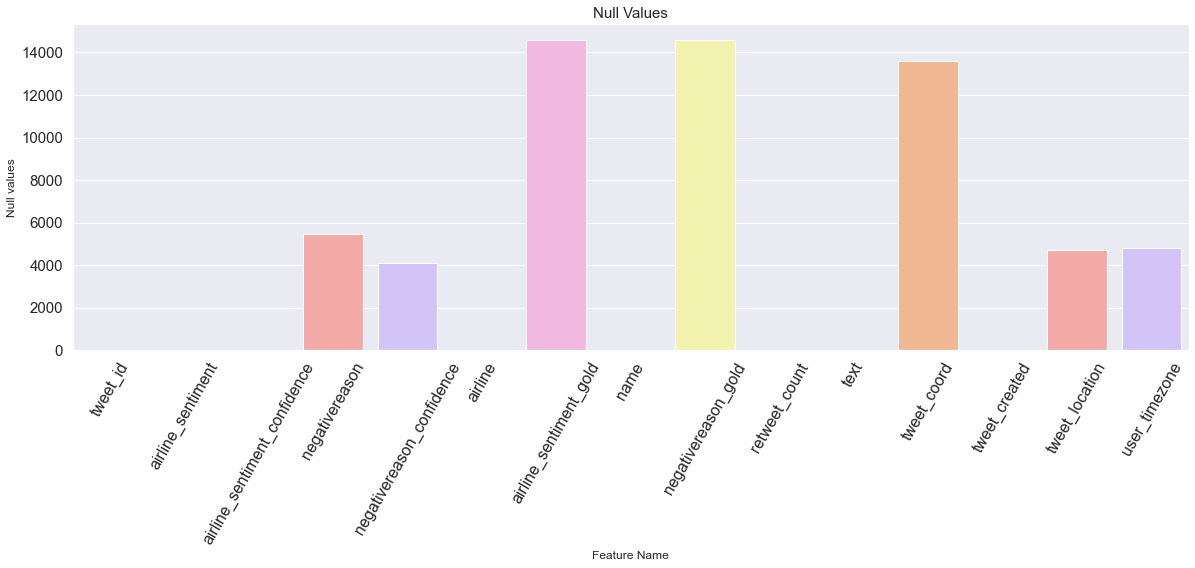

<IPython.core.display.Javascript object>

In [12]:
# Plot null values in data set
plt.figure(figsize=(20, 6))
sns.barplot(data=tweets_data_null, x="Feature Name", y="Null values", palette="pastel")
plt.title("Null Values", fontsize=15)
plt.xticks(rotation=60, fontsize=16)
plt.yticks(fontsize=15)
plt.show()

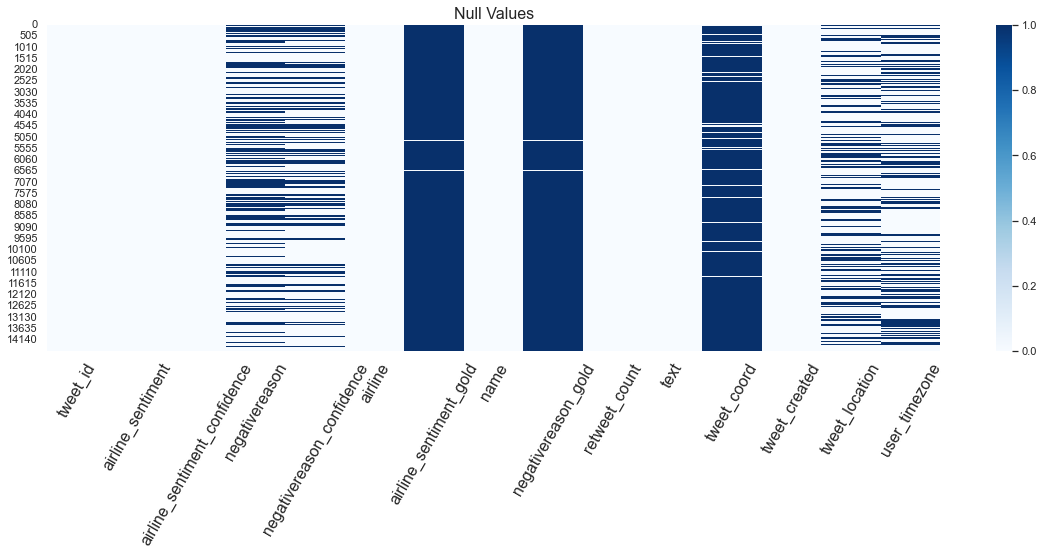

<IPython.core.display.Javascript object>

In [13]:
# Visualization of missing value using heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(tweets_data.isnull(), cmap="Blues")
plt.title("Null Values", fontsize=16)
plt.xticks(rotation=60, fontsize=16)
plt.show()

#### Observation : 
1. There are more than 90% of missing values in columns "negativereason_gold", "airline_sentiment_gold" and "tweet_coord".

In [14]:
# Check unique values in data set
tweets_data_unique = pd.DataFrame(
    {
        "Unique values": tweets_data.nunique(),
        "Percentage of Unique values": round(
            (tweets_data.nunique() / tweets_data.shape[0] * 100), 2
        ),
        "Data Type": tweets_data.dtypes,
    }
)
tweets_data_unique.reset_index(inplace=True)
tweets_data_unique.rename(columns={"index": "Feature Name"}, inplace=True)
tweets_data_unique

,Feature Name,Unique values,Percentage of Unique values,Data Type
0,tweet_id,14485,98.94,int64
1,airline_sentiment,3,0.02,object
2,airline_sentiment_confidence,1023,6.99,float64
3,negativereason,10,0.07,object
4,negativereason_confidence,1410,9.63,float64
5,airline,6,0.04,object
6,airline_sentiment_gold,3,0.02,object
7,name,7701,52.60,object
8,negativereason_gold,13,0.09,object
9,retweet_count,18,0.12,int64


<IPython.core.display.Javascript object>

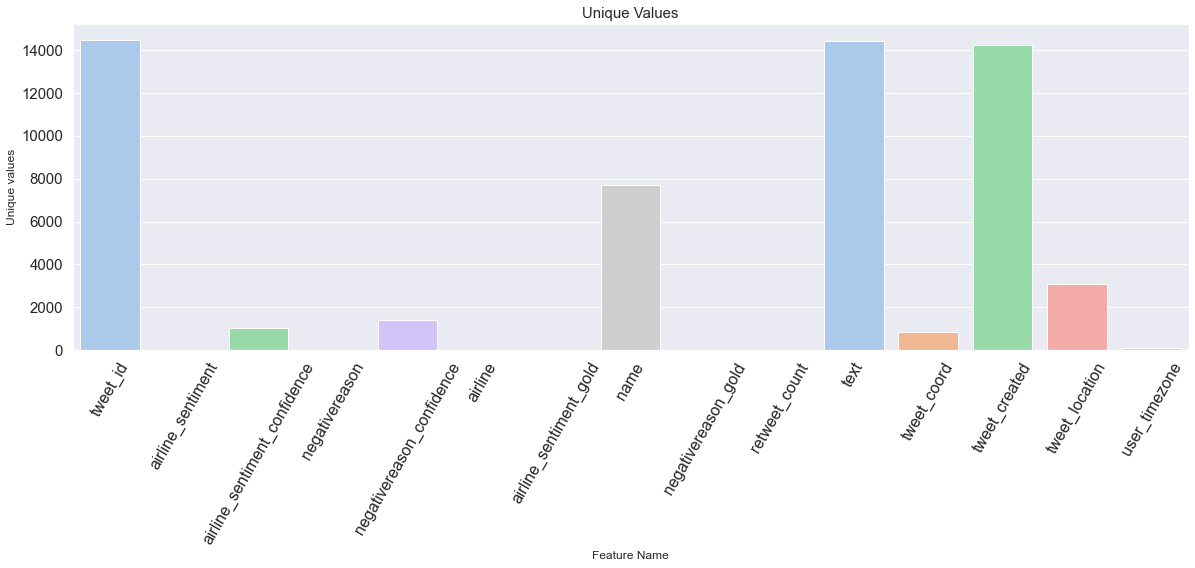

<IPython.core.display.Javascript object>

In [15]:
# Plot unique values in data set
plt.figure(figsize=(20, 6))
sns.barplot(data=tweets_data_unique,x='Feature Name',y= 'Unique values',palette="pastel")
plt.title("Unique Values", fontsize=15)
plt.xticks(rotation=60, fontsize=16)
plt.yticks(fontsize=15)
plt.show()



#### Observation : 
1. There are more than 90% of unique values in columns "tweet_id", "text" and "tweet_created".

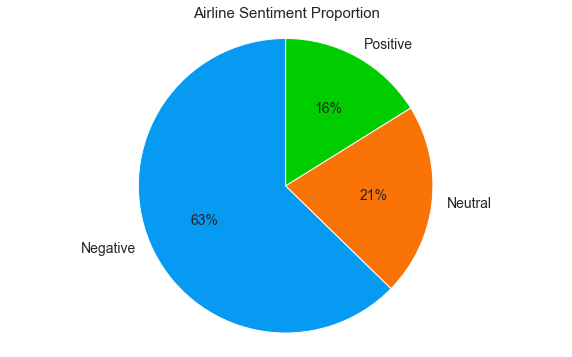

<IPython.core.display.Javascript object>

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Negative", "Neutral", "Positive"
sizes = [
    tweets_data.airline_sentiment[
        tweets_data["airline_sentiment"] == "negative"
    ].count(),
    tweets_data.airline_sentiment[
        tweets_data["airline_sentiment"] == "neutral"
    ].count(),
    tweets_data.airline_sentiment[
        tweets_data["airline_sentiment"] == "positive"
    ].count(),
]
# explode = (0, 0.15)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(
    sizes,
    # explode=explode,
    labels=labels,
    autopct="%0.0f%%",
    # shadow=True,
    startangle=90,
    # radius=5,
    textprops={"fontsize": 14},
    colors=["#069AF3", "#F97306", "#00CD00"],
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Airline Sentiment Proportion", size=15)
plt.show()

#### Observation : 
1. The target data "airline_sentiment" is imbalanced. Need to add "class weight" while model building.
2. Sentiment "negative" is 63%, "neutral" is 21% and "positive" is 16%.

### 4. Exploratory Data Analysis <a id='4. Exploratory Data Analysis'></a>

In [17]:
# function to create labeled barplots


def labeled_barplot(data, column, perc=False, n=None, h=None, fig_size=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[column])  # length of the column
    count = data[column].nunique()

    if h is None:
        l = 0
    else:
        l = 20

    if fig_size is not None:
        plt.figure(figsize=(fig_size))
    else:
        if n is None:
            plt.figure(figsize=(l + count + 1, 5))
        else:
            plt.figure(figsize=(l + n + 2, 5))

    ax = sns.countplot(
        data=data,
        x=column,
        hue=h,
        palette="pastel",
        order=data[column].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=13,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=14)

    plt.show()

<IPython.core.display.Javascript object>

In [18]:
# Check datatypes of columns and apply above functions according to column data type
tweets_data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

<IPython.core.display.Javascript object>

#### A. Plot the distribution of all tweets among each airline

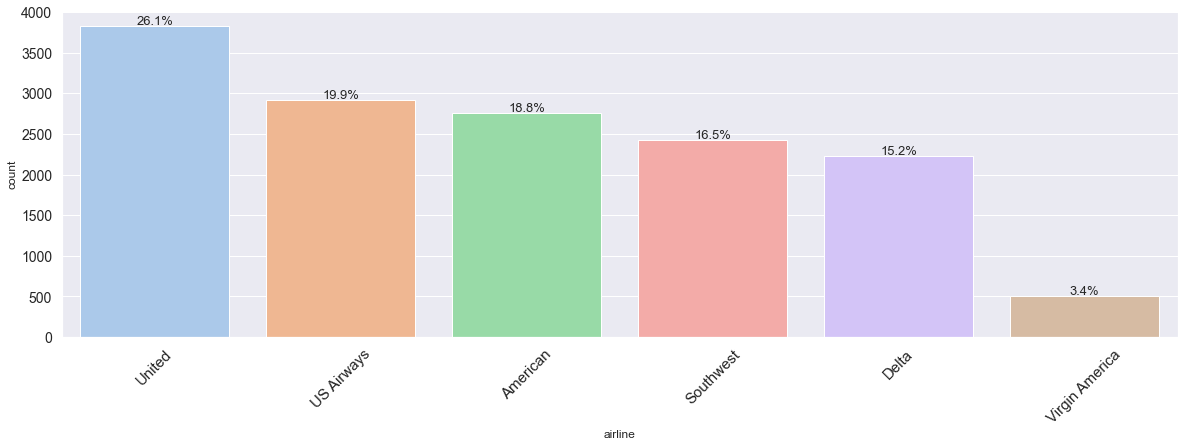

<IPython.core.display.Javascript object>

In [19]:
# Visualize data through plot
labeled_barplot(tweets_data, "airline", perc=True, fig_size=(20, 6))

#### Observation & Insights: 

1. Most of the users had tweeted about "United" airlines (26.1%)
2. Second most of the users had tweeted about "US Airways" airlines (19.9%)
3. Third most of the users had tweeted about "American" airlines (18.8%)
4. There are six airlines - "United", "US Airways", "American", "Southwest", "Delta" and "Virgin America"


#### B. Plot the distribution of sentiment across all the tweets

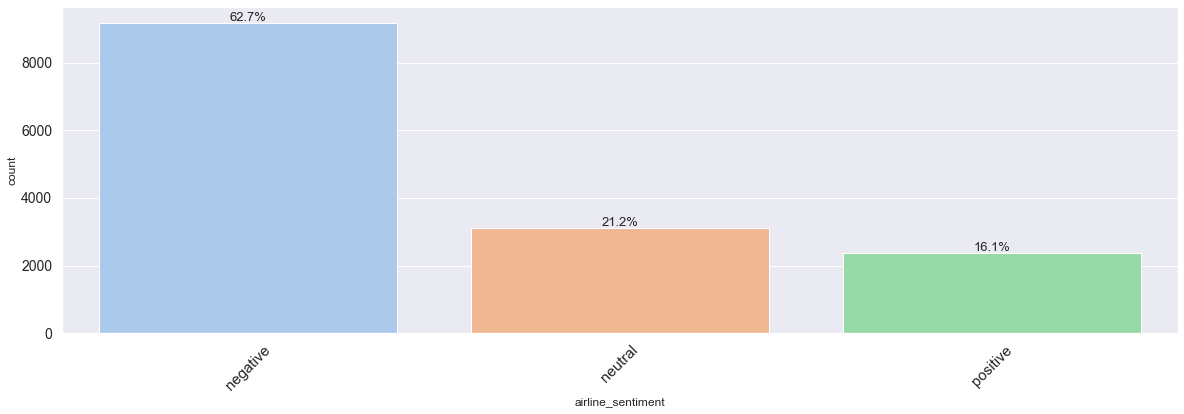

<IPython.core.display.Javascript object>

In [20]:
# Visualize data through plot
labeled_barplot(tweets_data, "airline_sentiment", perc=True, fig_size=(20, 6))

#### Observation & Insights: 

1. Most of the users had tweeted "negative" sentiments (62.7%)
2. Second most of the users had tweeted "neutral" sentiments (21.2%)
3. Third most of the users had tweeted "positive" sentiments (16.1%)
4. There are three sentiments - "negative", "neutral" and "positive"


#### C. Plot the distribution of Sentiment of tweets for each airline

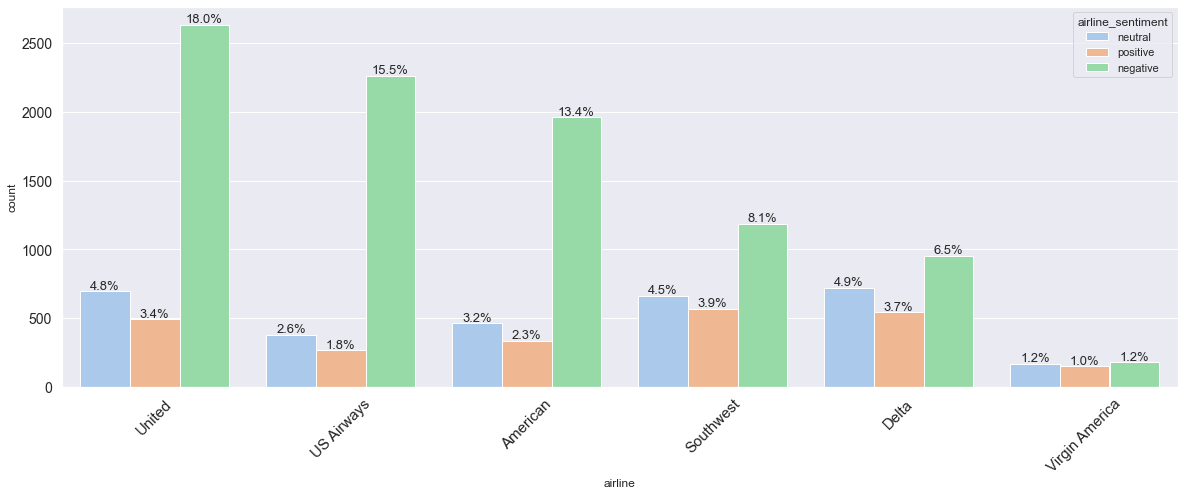

<IPython.core.display.Javascript object>

In [21]:
# Visualize data through plot
labeled_barplot(
    tweets_data, "airline", perc=True, h="airline_sentiment", fig_size=(20, 7)
)

#### Observation & Insights: 

1. Most of the users had tweeted "negative" sentiments for airlines "United", "US Airways" and "American. There is a large difference between count of "negative" sentiments against other sentiments.
2. Users of airline "Southwest" and "Delta" also had more "negative" sentiment tweets. However, count different with other sentiments are not too large
3. Airline "Virgin America" has all three sentiments with almost similar counts


#### D. Plot the  distribution of all the negative reasons

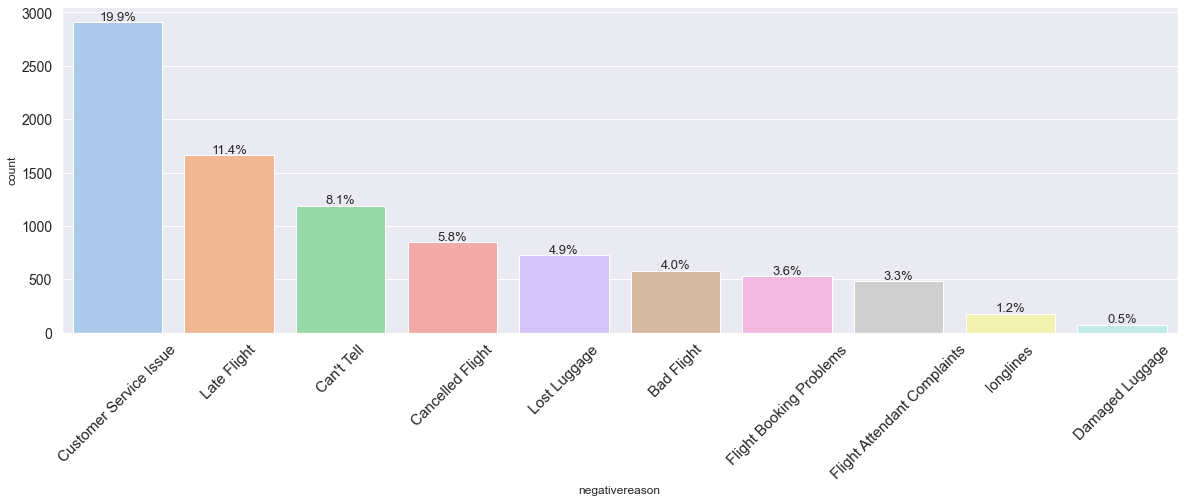

<IPython.core.display.Javascript object>

In [22]:
# Visualize data through plot
labeled_barplot(tweets_data, "negativereason", perc=True, fig_size=(20, 6))

#### Observation & Insights: 

1. Most of the users had reported "Customer Service Issue" as reason for their negative sentiments (19.9%)
2. Second most of the users had reported "Late Flight" as reason for their negative sentiments (11.4%)
3. Third most of the users had reported "Can't Tell" as reason for their negative sentiments (8.1%)
4. There are ten negative sentiment reasons - 'Bad Flight', "Can't Tell", 'Late Flight', 'Customer Service Issue', 'Flight Booking Problems', 'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight', 'Damaged Luggage', 'longlines'


#### E. Plot the distribution of negative reasons for each airline

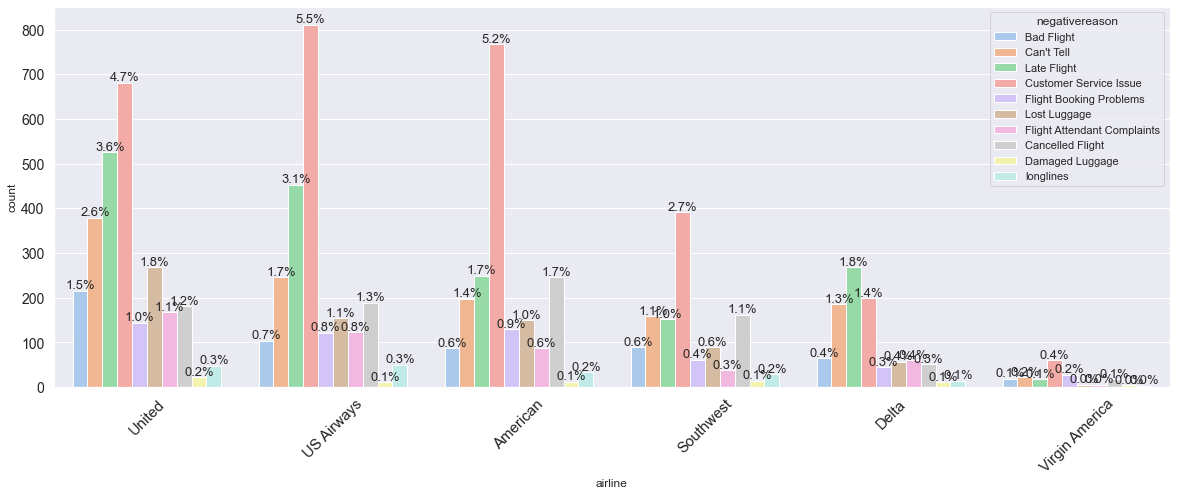

<IPython.core.display.Javascript object>

In [23]:
# Visualize data through plot
labeled_barplot(tweets_data, "airline", perc=True, h="negativereason", fig_size=(20, 7))

#### Observation & Insights: 

1. Most of the users had reported "Customer Service Issue" as most frequent negative sentiment reason for airlines "United", "US Airways", "American" and "Southwest". There is a large difference between count of these "negative" sentiments against other sentiments.
2. Users of airline "Delta" had reported "Late Flight" as most frequent negative sentiment reason. 
3. Airline "Virgin America" has all negative reasons with almost similar counts


#### F. Plot the distribution of names

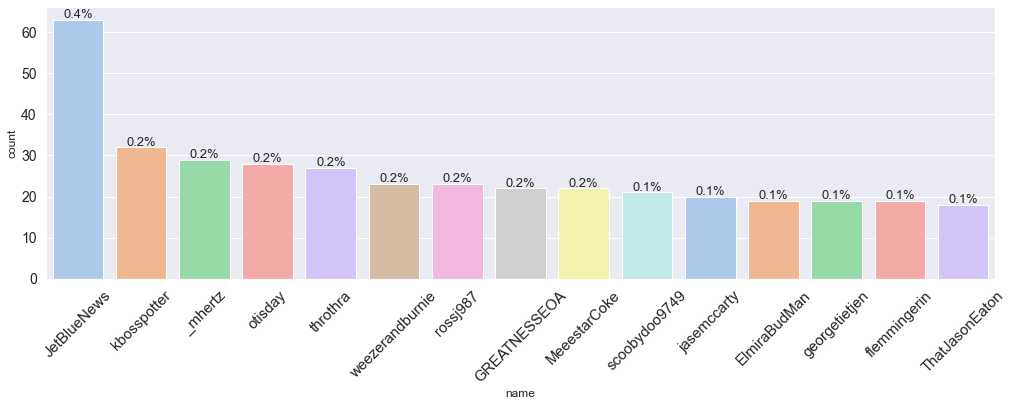

<IPython.core.display.Javascript object>

In [24]:
# Visualize data through plot
labeled_barplot(tweets_data, "name", perc=True, n=15)  # fig_size=(20, 7)

#### Observation & Insights: 

1. Highest tweets were made from user named "JetBlueNews" (0.4%). But, its still very minimum compared to large user list
2. Followed by 0.2% and 0.1% of others which all are very less


#### G. Plot the distribution of tweet location

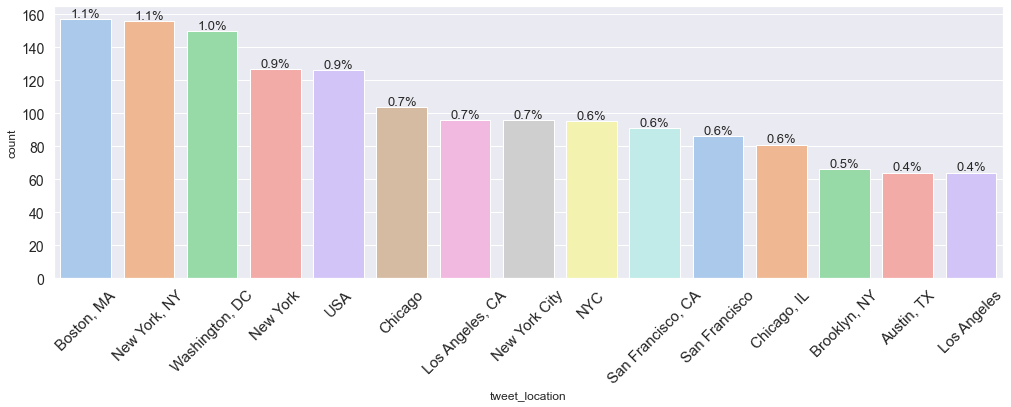

<IPython.core.display.Javascript object>

In [25]:
# Visualize data through plot
labeled_barplot(tweets_data, "tweet_location", perc=True, n=15)  # fig_size=(20, 7)

#### Observation & Insights: 

1. Highest tweets were made from location "Boston, MA" (1.1%). But, its still very minimum compared to large and diverse location list



#### H. Plot the distribution of users timezone

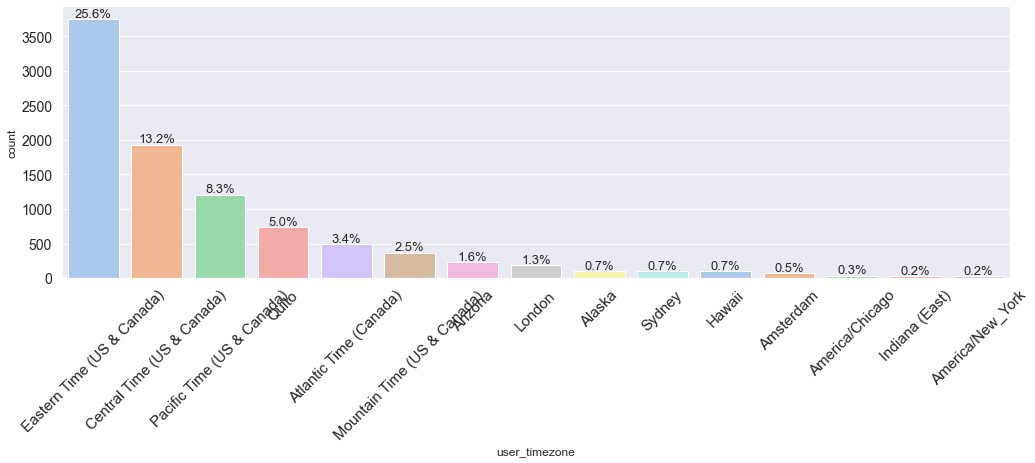

<IPython.core.display.Javascript object>

In [26]:
# Visualize data through plot
labeled_barplot(tweets_data, "user_timezone", perc=True, n=15)  # fig_size=(20, 7)

#### Observation & Insights: 

1. Most of the users had tweeted from "Eastern Time" (25.6%)
2. Second most of the users had tweeted from "Central Time" (13.2%)
3. Third most of the users had tweeted from "Pacific Time" (8.3%)
4. Almost 46% of tweets were made from US timezone


#### I. Plot the word cloud graph of tweets for positive sentiment

In [27]:
# Get words used in postive sentiment tweets
positive_tweets = tweets_data[tweets_data["airline_sentiment"] == "positive"]
words = " ".join(positive_tweets["text"])
positive_cleaned_word = " ".join(
    [
        word
        for word in words.split()
        if "http" not in word and not word.startswith("@") and word != "RT"
    ]
)

<IPython.core.display.Javascript object>

In [28]:
# Create function to plot wordcloud


def plot_wordcloud(words, title_text):
    wordcloud = WordCloud(
        stopwords=STOPWORDS,
        background_color="white",
        width=3000,
        height=2500,
        colormap="viridis",
    ).generate(words)
    plt.figure(1, figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.title(title_text, fontsize=20)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>

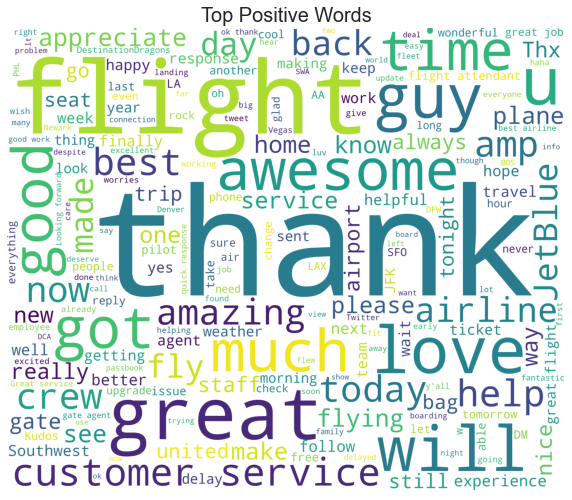

<IPython.core.display.Javascript object>

In [29]:
# Plot wordcloud
plot_wordcloud(positive_cleaned_word, "Top Positive Words")

#### Observation & Insights: 

1. Most prominent words found in positive sentiments are positive words. For example, "thank", "great", "awesome", "good", "love" etc


#### J. Plot the word cloud graph of tweets for negative sentiment

In [30]:
# Get words used in negative sentiment tweets
negative_tweets = tweets_data[tweets_data["airline_sentiment"] == "negative"]
words = " ".join(negative_tweets["text"])
negative_cleaned_word = " ".join(
    [
        word
        for word in words.split()
        if "http" not in word and not word.startswith("@") and word != "RT"
    ]
)

<IPython.core.display.Javascript object>

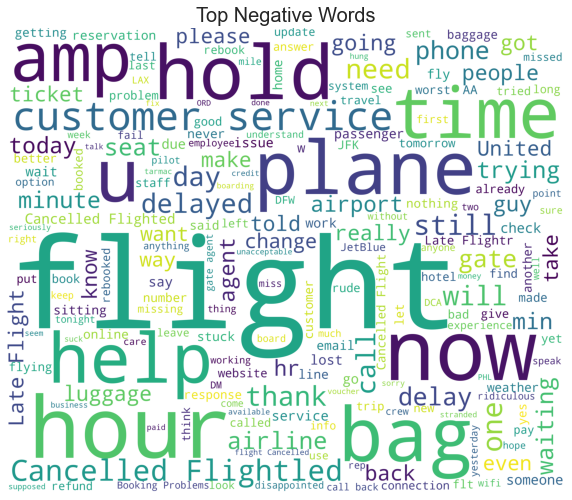

<IPython.core.display.Javascript object>

In [31]:
# Plot wordcloud
plot_wordcloud(negative_cleaned_word, "Top Negative Words")

#### Observation & Insights: 

1. Most prominent words found in negative sentiments are negative words. For example, "hold", "Cancelled", "help", "time", "customer", "service" etc


#### K. Plot the word cloud graph of tweets for neutral sentiment

In [32]:
# Get words used in negative sentiment tweets
neutral_tweets = tweets_data[tweets_data["airline_sentiment"] == "neutral"]
words = " ".join(neutral_tweets["text"])
neutral_cleaned_word = " ".join(
    [
        word
        for word in words.split()
        if "http" not in word and not word.startswith("@") and word != "RT"
    ]
)

<IPython.core.display.Javascript object>

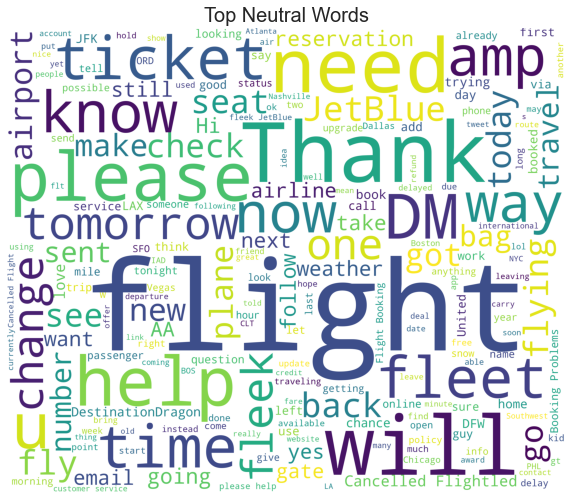

<IPython.core.display.Javascript object>

In [33]:
# Plot wordcloud
plot_wordcloud(neutral_cleaned_word, "Top Neutral Words")

#### Observation & Insights: 

1. Most prominent words found in neutral sentiments are neutral words. 


### 5. Understanding of Data Columns <a id='5. Understanding of Data Columns'></a>

### Insights on each columns are listed below:


**1. tweet_id :** Column "tweet_id" is unique values to each tweets made by users. It doesnt help with sentiment analysis and can be dropped before model building.

**2. airline_sentiment :** Column "airline_sentiment" is the target variable. Its the mandatory feature which can help to train model for sentiment analysis.
  -  Value "positive" means "Customer had positive sentiment towards a particular US airline"
  -  Value "negative" means "Customer had negative sentiment towards a particular US airline"
  -  Value "neutral" means "Customer had neutral sentiment towards a particular US airline"

**3. airline_sentiment_confidence :** Column "airline_sentiment_confidence" shows how much a person is confident on his/her sentiment. 

**4. negativereason :** Column "negativereason" is reason for 'negative' sentiment

**5. negativereason_confidence :** Column "negativereason_confidence" shows how much a person is confident on his/her 'negative' sentiment reason

**6. airline :** Column "airline" is US airline for which sentiments were created

**7. airline_sentiment_gold :** Column "airline_sentiment_gold" probably means a very special sentiment

**8. name :** Column "name" is name of the person who created sentiment

**9. negativereason_gold :** Column "negativereason_gold" probably means a very specia negative reason

**10. retweet_count :** Column "retweet_count" shows how many times tweet were re-tweeted

**11. text :** Column "text" is the tweet created by users which has their opinion/feedback about US airlines

**12. tweet_coord :** Column "tweet_coord" is the geographical co-ordinates from where tweet were created

**13. tweet_created :** Column "tweet_created" shows date and time when tweets were created

**14. tweet_location :** Column "tweet_location" shows location from where tweets were created

**15. user_timezone :** Column "user_timezone" shows time zone at which tweets were created


#### Observation: 

1. All columns except "text" and "airline_sentiment" are not relevant for model building. So those columns can be dropped


#### A. Drop all other columns except “text” and “airline_sentiment”.

In [34]:
# Make a copy of tweets data
tweets_data_EDA_Copy = tweets_data.copy()

<IPython.core.display.Javascript object>

In [35]:
# Drop columns except “text” and “airline_sentiment”
tweets_data = tweets_data[["text", "airline_sentiment"]]

<IPython.core.display.Javascript object>

#### B. Check the shape of the data.

In [36]:
# Check shape of data
tweets_data.shape

(14640, 2)

<IPython.core.display.Javascript object>

#### C. Print the first 5 rows of data.

In [37]:
# Print first 5 rows of data
pd.set_option("display.max_colwidth", None)
tweets_data.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


<IPython.core.display.Javascript object>

#### Observation & Insights: 

1. Only two columns "text" and "airline_sentiment" is listed
2. Column "text" has users comments about airlines. 
3. Column "text" need to be pre-processed to remove tags, special characters etc
4. Column "text" also must be vectorized to feed data into model for prediction
5. Column "airline_sentiment" can be used as target variable in supervised learning models


### 6. Data Preprocessing <a id='6. Data Preprocessing'></a>

* Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a method to resolve such issues.

**Data Pre-processing steps here:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Remove the URL's.
- Remove the mentions in the tweets('@').
- Tokenization.
- To remove Stopwords.
- Remove the punctuations.
- Remove the non-ASCII characters.
- Remove the hashtags.
- Lemmatized data.
- We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

#### A. Html tag removal. 

In [38]:
# remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

<IPython.core.display.Javascript object>

In [39]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: strip_html(x))
tweets_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


<IPython.core.display.Javascript object>

#### B. Expand the contractions

In [40]:
# expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

<IPython.core.display.Javascript object>

In [41]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: replace_contractions(x))
tweets_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


<IPython.core.display.Javascript object>

#### C. Remove the numbers. 

In [42]:
# remove the numericals present in the text
def remove_numbers(text):
    text = re.sub(r"\d+", "", text)
    return text

<IPython.core.display.Javascript object>

In [43]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: remove_numbers(x))
tweets_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


<IPython.core.display.Javascript object>

#### D. Remove the url's present in the text

In [44]:
# remove the url's present in the text
def remove_url(text):
    text = re.sub(
        "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
        "",
        text,
    )
    return text

<IPython.core.display.Javascript object>

In [45]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: remove_url(x))
tweets_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


<IPython.core.display.Javascript object>

#### E. Remove the mentions in the tweets

In [46]:
# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r"@\w+", "", text)
    return text

<IPython.core.display.Javascript object>

In [47]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: remove_mention(x))
tweets_data.head()

,text,airline_sentiment
0,What said.,neutral
1,plus you have added commercials to the experience... tacky.,positive
2,I did not today... Must mean I need to take another trip!,neutral
3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,and it is a really big bad thing about it,negative


<IPython.core.display.Javascript object>

#### F. Tokenization. 

In [48]:
# Apply tokenization function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: word_tokenize(x))
tweets_data.head()

,text,airline_sentiment
0,"[What, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative


<IPython.core.display.Javascript object>

#### G. Remove the non-ASCII characters

In [49]:
#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words



<IPython.core.display.Javascript object>

In [50]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: remove_non_ascii(x))
tweets_data.head()

,text,airline_sentiment
0,"[What, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative


<IPython.core.display.Javascript object>

#### H. Convert all characters to lowercase

In [51]:
# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

<IPython.core.display.Javascript object>

In [52]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: to_lowercase(x))
tweets_data.head()

,text,airline_sentiment
0,"[what, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[i, did, not, today, ..., must, mean, i, need, to, take, another, trip, !]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative


<IPython.core.display.Javascript object>

#### I. Remove the hashtags

In [53]:
# Remove the hashtags
def remove_hash(words):
    """Remove hashtags from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r"#\w+", "", word)
        if new_word != "":
            new_words.append(new_word)
    return new_words

<IPython.core.display.Javascript object>

In [54]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: remove_hash(x))
tweets_data.head()

,text,airline_sentiment
0,"[what, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[i, did, not, today, ..., must, mean, i, need, to, take, another, trip, !]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative


<IPython.core.display.Javascript object>

#### J. Removal of Special Characters 

In [55]:
# remove the special characters present in the text
def remove_special_characters(words):
    """Remove special characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^a-zA-z\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words



<IPython.core.display.Javascript object>

In [56]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: remove_special_characters(x))
tweets_data.head()

,text,airline_sentiment
0,"[what, said]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[i, did, not, today, must, mean, i, need, to, take, another, trip]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative


<IPython.core.display.Javascript object>

#### K. Removal the punctuations

In [57]:
# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r"[^\w\s]", "", word)
        if new_word != "":
            new_words.append(new_word)
    return new_words

<IPython.core.display.Javascript object>

In [58]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: remove_punctuation(x))
tweets_data.head()

,text,airline_sentiment
0,"[what, said]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[i, did, not, today, must, mean, i, need, to, take, another, trip]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative


<IPython.core.display.Javascript object>

#### L. Removal of stopwords 

In [59]:
# Get english stopwords
stopwords = nltk.corpus.stopwords.words("english")

<IPython.core.display.Javascript object>

In [60]:
# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment,
# so not removing them from original data.


customlist = [
    "no",
    "not",
    "couldn't",
    "didn",
    "didn't",
    "doesn",
    "doesn't",
    "hadn",
    "hadn't",
    "hasn",
    "hasn't",
    "haven",
    "haven't",
    "isn",
    "isn't",
    "ma",
    "mightn",
    "mightn't",
    "mustn",
    "mustn't",
    "needn",
    "needn't",
    "shan",
    "shan't",
    "shouldn",
    "shouldn't",
    "wasn",
    "wasn't",
    "weren",
    "weren't",
    "won",
    "won't",
    "wouldn",
    "wouldn't",
]


stopwords = list(set(stopwords) - set(customlist))

<IPython.core.display.Javascript object>

In [61]:
# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words


<IPython.core.display.Javascript object>

In [62]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: remove_stopwords(x))
tweets_data.head()

,text,airline_sentiment
0,[said],neutral
1,"[plus, added, commercials, experience, tacky]",positive
2,"[not, today, must, mean, need, take, another, trip]",neutral
3,"[really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]",negative
4,"[really, big, bad, thing]",negative


<IPython.core.display.Javascript object>

#### M. Lemmatize or stemming. 

In [63]:
# lemmatize the words
lemmatizer = WordNetLemmatizer()


def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos="v"))
    return new_words

<IPython.core.display.Javascript object>

In [64]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: lemmatize_list(x))
tweets_data.head()

,text,airline_sentiment
0,[say],neutral
1,"[plus, add, commercials, experience, tacky]",positive
2,"[not, today, must, mean, need, take, another, trip]",neutral
3,"[really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]",negative
4,"[really, big, bad, thing]",negative


<IPython.core.display.Javascript object>

#### N. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) 

In [65]:
def join_words(words):

    return ' '.join(words)


<IPython.core.display.Javascript object>

In [66]:
# Apply above function and view data
tweets_data["text"] = tweets_data["text"].apply(lambda x: join_words(x))
tweets_data.head()

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,not today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


<IPython.core.display.Javascript object>

#### O. Print the first 5 rows of data after pre-processing.

In [67]:
# Print first 5 rows of data
tweets_data.head()

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,not today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


<IPython.core.display.Javascript object>

#### Observation & Insights: 

1. Only two columns "text" and "airline_sentiment" is listed
2. Column "text" has users comments about airlines. 
3. Column "text" is cleaned up after pre-processed to remove tags, special characters etc
4. Column "text" can be now vectorized to feed data into model for prediction
5. Column "airline_sentiment" can be used as target variable in supervised learning models


### 7. Vectorization, Modeling, Cross-Validation, and Evaluation<a id='7. Vectorization'></a>

#### A. Bag of Words (CountVectorizer)
      
In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are **d** unique words in our dictionary then for every review the vector will be of length **d** and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.



In [68]:
# Vectorization (Convert text data to numbers)

bow_vec = CountVectorizer(
    max_features=2000
)  # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(tweets_data["text"])

data_features = data_features.toarray()  # Convert the data features to array.

<IPython.core.display.Javascript object>

In [69]:
# Check shape of data after vectorizing
data_features.shape

(14640, 2000)

<IPython.core.display.Javascript object>

In [70]:
# Create X and Y data for independent and dependent variables respectively
X = data_features

y = tweets_data.airline_sentiment

<IPython.core.display.Javascript object>

In [71]:
# Split data into temporary and testing set

# Splitting data in temporary and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, shuffle=False
)

<IPython.core.display.Javascript object>

In [72]:
# Splitting temporary data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, shuffle=False
)

<IPython.core.display.Javascript object>

In [73]:
# Check split of data

print(
    "{0:0.2f}% data is in Training set".format(
        (len(X_train) / len(tweets_data.index)) * 100
    )
)
print(
    "{0:0.2f}% data is in Validation set".format(
        (len(X_val) / len(tweets_data.index)) * 100
    )
)
print(
    "{0:0.2f}% data is in Test set".format((len(X_test) / len(tweets_data.index)) * 100)
)

60.00% data is in Training set
20.00% data is in Validation set
20.00% data is in Test set


<IPython.core.display.Javascript object>

In [74]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(10, 50, 10).tolist()
base_ln

[10, 20, 30, 40]

<IPython.core.display.Javascript object>

In [75]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    bow_vec_clf = RandomForestClassifier(
        class_weight={"neutral": 0.45, "positive": 0.35, "negative": 0.2},
        n_estimators=b,
    )
    stratifiedkf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(
        bow_vec_clf, X_train, y_train, cv=stratifiedkf, scoring="accuracy"
    )
    cv_scores.append(scores.mean())

<IPython.core.display.Javascript object>

In [76]:
y_train.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

<IPython.core.display.Javascript object>

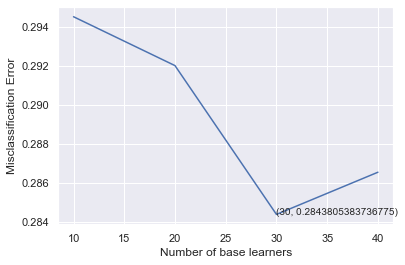

<IPython.core.display.Javascript object>

In [77]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]  # error corresponds to each nu of estimator
optimal_learners = base_ln[
    error.index(min(error))
]  # Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(
    base_ln, error
)  # Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [78]:
# Training the best model and calculating accuracy on test data .
bow_vec_clf = RandomForestClassifier(
    class_weight={"neutral": 0.45, "positive": 0.35, "negative": 0.2},
    n_estimators=optimal_learners,
)
bow_vec_clf.fit(X_train, y_train)
bow_vec_clf.score(X_val, y_val)
count_vectorizer_predicted = bow_vec_clf.predict(X_val)
# count_vectorizer_predicted = rf_estimator_tuned.predict(X_test)
print(
    classification_report(
        y_val, count_vectorizer_predicted,  # target_names=["0", "1", "2"]
    )
)
print(
    "Accuracy of the model is : ",
    metrics.accuracy_score(y_val, count_vectorizer_predicted),
)

              precision    recall  f1-score   support

    negative       0.88      0.89      0.88      2203
     neutral       0.49      0.43      0.46       429
    positive       0.59      0.65      0.62       296

    accuracy                           0.80      2928
   macro avg       0.65      0.66      0.65      2928
weighted avg       0.79      0.80      0.79      2928

Accuracy of the model is :  0.7967896174863388


<IPython.core.display.Javascript object>

In [79]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision, F1 and ROC-AUC Score
def get_metrics_score(model, flag=True, include_test=None, threshold=0.5):
    """
    model : classifier to predict values of X

    """

    # defining an empty list to store train and test results
    score_list = []

    # Predicting on train, validation and tests
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    pred_test = model.predict(X_test)

    # Accuracy of the model
    train_acc = metrics.accuracy_score(y_train, pred_train)
    val_acc = metrics.accuracy_score(y_val, pred_val)
    test_acc = metrics.accuracy_score(y_test, pred_test)

    # Recall of the model
    train_recall = metrics.recall_score(y_train, pred_train, average="weighted")
    val_recall = metrics.recall_score(y_val, pred_val, average="weighted")
    test_recall = metrics.recall_score(y_test, pred_test, average="weighted")

    # Precision of the model
    train_precision = metrics.precision_score(y_train, pred_train, average="weighted")
    val_precision = metrics.precision_score(y_val, pred_val, average="weighted")
    test_precision = metrics.precision_score(y_test, pred_test, average="weighted")

    # F1 Score of the model
    train_f1 = metrics.f1_score(y_train, pred_train, average="weighted")
    val_f1 = metrics.f1_score(y_val, pred_val, average="weighted")
    test_f1 = metrics.f1_score(y_test, pred_test, average="weighted")

    if include_test == None:
        score_list.extend(
            (
                train_acc,
                val_acc,
                train_recall,
                val_recall,
                train_precision,
                val_precision,
                train_f1,
                val_f1,
            )
        )

        # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
        if flag == True:

            display(
                pd.DataFrame(
                    {
                        # "Score": ["Accuracy", "Recall", "Precision", "F1","ROC-AUC"],
                        "Training Score": [
                            train_acc,
                            train_recall,
                            train_precision,
                            train_f1,
                        ],
                        "Validation Score": [
                            val_acc,
                            val_recall,
                            val_precision,
                            val_f1,
                        ],
                    },
                    index=["Accuracy", "Recall", "Precision", "F1"],
                )
            )
    else:
        score_list.extend(
            (
                train_acc,
                val_acc,
                test_acc,
                train_recall,
                val_recall,
                test_recall,
                train_precision,
                val_precision,
                test_precision,
                train_f1,
                val_f1,
                test_f1,
            )
        )

        # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
        if flag == True:

            display(
                pd.DataFrame(
                    {
                        # "Score": ["Accuracy", "Recall", "Precision", "F1","ROC-AUC"],
                        "Training Score": [
                            train_acc,
                            train_recall,
                            train_precision,
                            train_f1,
                        ],
                        "Validation Score": [
                            val_acc,
                            val_recall,
                            val_precision,
                            val_f1,
                        ],
                        "Testing Score": [
                            test_acc,
                            test_recall,
                            test_precision,
                            test_f1,
                        ],
                    },
                    index=["Accuracy", "Recall", "Precision", "F1"],
                )
            )

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [80]:
# Use function to get accuracy, recall, precision and F1 on train and validation set
count_vectorizer_score = get_metrics_score(bow_vec_clf)

,Training Score,Validation Score
Accuracy,0.99,0.80
Recall,0.99,0.80
Precision,0.99,0.79
F1,0.99,0.79


<IPython.core.display.Javascript object>

In [81]:
def plot_confusion_matrix(model, X_data, y_data, text):

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    count_vectorizer_predicted = model.predict(X_data)
    confusion_matrix = metrics.confusion_matrix(y_data, count_vectorizer_predicted)
    f, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=0.002,
        fmt="d",
        square=True,
        ax=ax,
        cmap="Blues",
        linecolor="black",
        xticklabels=["negative", "neutral", "positive"],
        yticklabels=["negative", "neutral", "positive"],
    )
    plt.xticks(rotation=0, fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    ax.set_ylabel("Actual", fontsize=20)
    ax.set_xlabel("Predicted", fontsize=20)
    ax.set_title("Confusion Matrix For " + text + " Data \n\n", fontsize=15)
    plt.show()

<IPython.core.display.Javascript object>

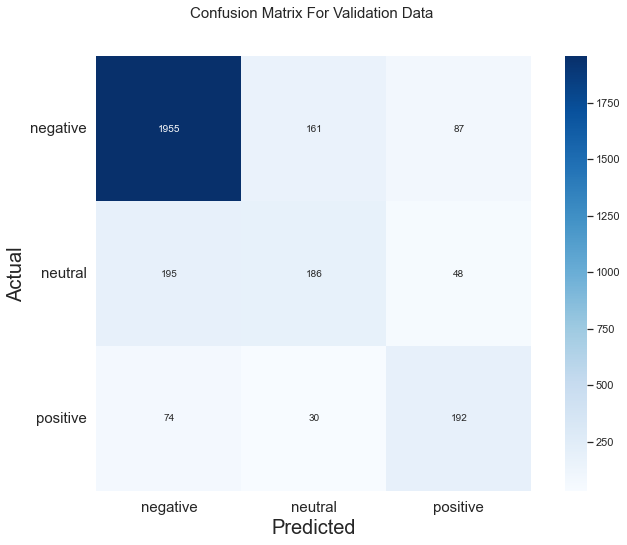

<IPython.core.display.Javascript object>

In [82]:
# Plot confusion matrix
plot_confusion_matrix(bow_vec_clf, X_val, y_val, "Validation")

In [83]:
all_features = (
    bow_vec.get_feature_names()
)  # Instantiate the feature from the vectorizer
top_features = (
    ""  # Addition of top 40 feature into top_feature after training the model
)
feat = bow_vec_clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features += all_features[i]
    top_features += ","

print(top_features)


thank,not,delay,great,no,love,flight,bag,hours,awesome,cancel,hold,get,wait,worst,time,amaze,hour,customer,best,please,lose,good,would,go,fleet,airline,make,never,fly,fleek,need,service,hrs,help,guy,know,really,tell,try,


<IPython.core.display.Javascript object>

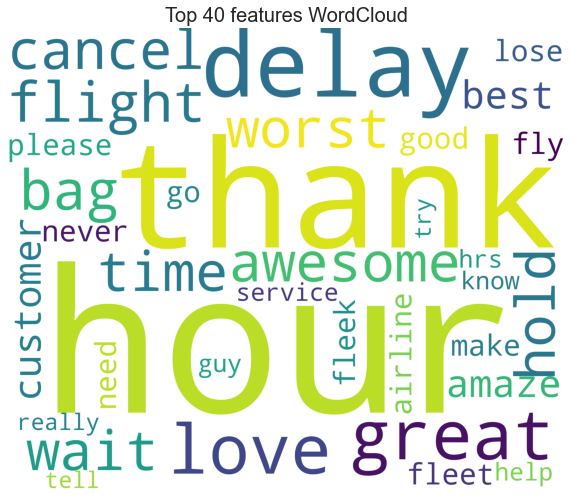

<IPython.core.display.Javascript object>

In [84]:
# Plot wordcloud
plot_wordcloud(top_features, "Top 40 features WordCloud")

#### B. TF-IDF (Term Frequency-Inverse Document Frequency)

**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [85]:
# Using TfidfVectorizer to convert text data to numbers.

tfidf_vect = TfidfVectorizer(max_features=2000)
data_features = tfidf_vect.fit_transform(tweets_data["text"])

data_features = data_features.toarray()

<IPython.core.display.Javascript object>

In [86]:
# Check shape of data after vectorizing
data_features.shape

(14640, 2000)

<IPython.core.display.Javascript object>

In [87]:
# Create X and Y data for independent and dependent variables respectively
X = data_features

y = tweets_data.airline_sentiment

<IPython.core.display.Javascript object>

In [88]:
# Split data into training and testing set

# Splitting data in temporary and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, shuffle=False
)

<IPython.core.display.Javascript object>

In [89]:
# Splitting temporary data in train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, shuffle=False
)

<IPython.core.display.Javascript object>

In [90]:
# Check split of data

print(
    "{0:0.2f}% data is in Training set".format(
        (len(X_train) / len(tweets_data.index)) * 100
    )
)
print(
    "{0:0.2f}% data is in Validation set".format(
        (len(X_val) / len(tweets_data.index)) * 100
    )
)
print(
    "{0:0.2f}% data is in Test set".format((len(X_test) / len(tweets_data.index)) * 100)
)

60.00% data is in Training set
20.00% data is in Validation set
20.00% data is in Test set


<IPython.core.display.Javascript object>

In [91]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(10, 50, 10).tolist()
base_ln

[10, 20, 30, 40]

<IPython.core.display.Javascript object>

In [92]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    tfidf_vect_clf = RandomForestClassifier(
        class_weight={"neutral": 0.45, "positive": 0.35, "negative": 0.2},
        n_estimators=b,
    )
    stratifiedkf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(
        tfidf_vect_clf, X_train, y_train, cv=stratifiedkf, scoring="accuracy"
    )
    cv_scores.append(scores.mean())

<IPython.core.display.Javascript object>

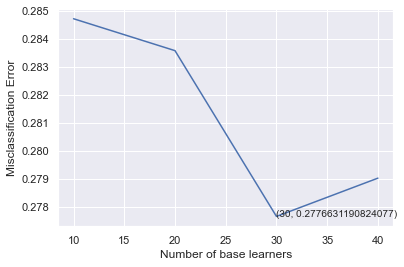

<IPython.core.display.Javascript object>

In [93]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]  # error corresponds to each nu of estimator
optimal_learners = base_ln[
    error.index(min(error))
]  # Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(
    base_ln, error
)  # Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [94]:
# Training the best model and calculating accuracy on test data .
tfidf_vect_clf = RandomForestClassifier(
    class_weight={"neutral": 0.45, "positive": 0.35, "negative": 0.2},
    n_estimators=optimal_learners,
)
tfidf_vect_clf.fit(X_train, y_train)
tfidf_vect_clf.score(X_val, y_val)
tf_idf_predicted = tfidf_vect_clf.predict(X_val)
print(classification_report(y_val, tf_idf_predicted))
print("Accuracy of the model is : ", metrics.accuracy_score(y_val, tf_idf_predicted))

              precision    recall  f1-score   support

    negative       0.87      0.91      0.89      2203
     neutral       0.54      0.46      0.49       429
    positive       0.67      0.59      0.63       296

    accuracy                           0.81      2928
   macro avg       0.69      0.65      0.67      2928
weighted avg       0.80      0.81      0.81      2928

Accuracy of the model is :  0.8145491803278688


<IPython.core.display.Javascript object>

In [95]:
# Use function to get accuracy, recall, precision and F1 on train and validation set
tf_idf_score = get_metrics_score(tfidf_vect_clf)

,Training Score,Validation Score
Accuracy,0.99,0.81
Recall,0.99,0.81
Precision,0.99,0.80
F1,0.99,0.81


<IPython.core.display.Javascript object>

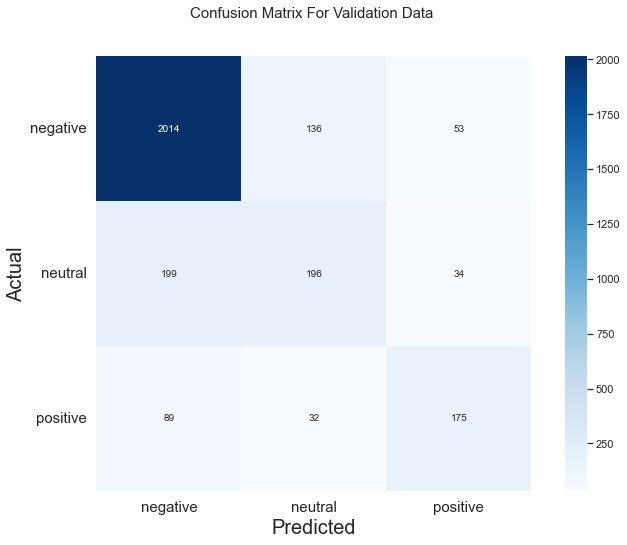

<IPython.core.display.Javascript object>

In [96]:
# Plot confusion matrix
plot_confusion_matrix(tfidf_vect_clf, X_val, y_val, "Validation")

In [97]:
all_features = (
    tfidf_vect.get_feature_names()
)  # Instantiate the feature from the vectorizer
top_features = (
    ""  # Addition of top 40 feature into top_feature after training the model
)
feat = tfidf_vect_clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features += all_features[i]
    top_features += ", "

print(top_features)


thank, not, delay, great, no, love, flight, bag, get, cancel, awesome, hours, wait, hold, hour, best, time, fleet, amaze, customer, worst, airline, fleek, please, lose, make, fly, good, service, never, would, go, much, need, guy, plane, help, dm, appreciate, still, 


<IPython.core.display.Javascript object>

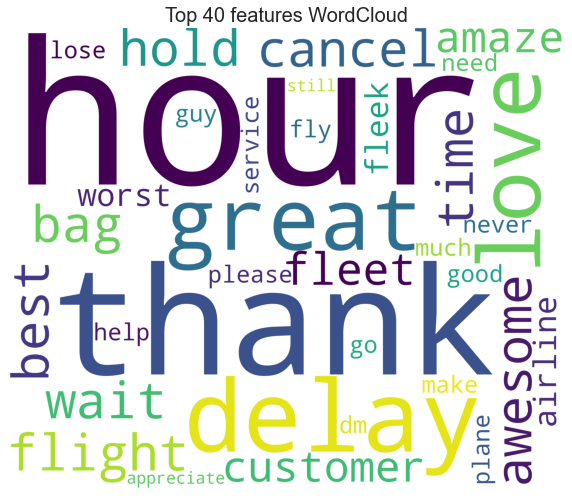

<IPython.core.display.Javascript object>

In [98]:
# Plot wordcloud
plot_wordcloud(top_features, "Top 40 features WordCloud")

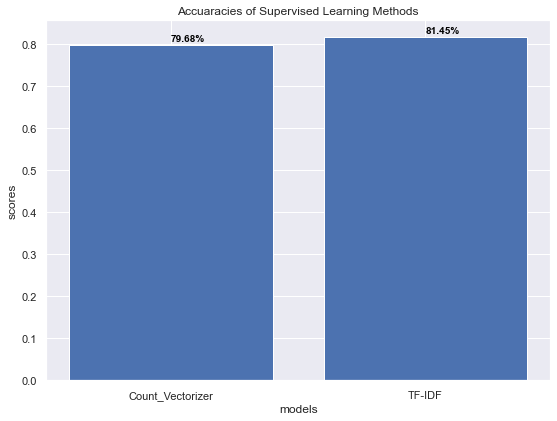

<IPython.core.display.Javascript object>

In [99]:
# create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF


fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
subjects = ["Count_Vectorizer", "TF-IDF"]

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
# count_vectorizer_predicted = bow_vec_clf.predict(X_test)
# tf_idf_predicted = tfidf_vect_clf.predict(X_test)
scores = [
    metrics.accuracy_score(y_val, count_vectorizer_predicted),
    metrics.accuracy_score(y_val, tf_idf_predicted),
]
ax.bar(subjects, scores)
ax.set_ylabel("scores", fontsize=12)  # y axis label
ax.set_xlabel("models", fontsize=12)  # x axis label
ax.set_title("Accuaracies of Supervised Learning Methods")  # tittle
for i, v in enumerate(scores):
    ax.text(i, v + 0.01, "{:.2f}%".format(100 * v), color="black", fontweight="bold")
    # plt.savefig("barplot_1.png", dpi=100, format="png", bbox_inches="tight")
plt.show()

#### Observation:

* **TF-IDF shows a better performance than Count Vectorizer**, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

In [100]:
# Use function to get accuracy, recall, precision and F1 on train, validation and test set
tf_idf_score = get_metrics_score(tfidf_vect_clf, include_test=True)

,Training Score,Validation Score,Testing Score
Accuracy,0.99,0.81,0.80
Recall,0.99,0.81,0.80
Precision,0.99,0.80,0.79
F1,0.99,0.81,0.80


<IPython.core.display.Javascript object>

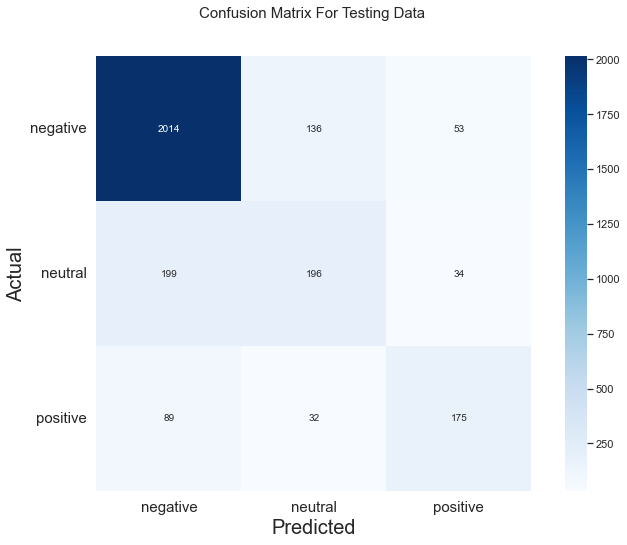

<IPython.core.display.Javascript object>

In [101]:
# Plot confusion matrix
plot_confusion_matrix(tfidf_vect_clf, X_val, y_val, "Testing")

#### C. VADER (Valence Aware Dictionary and Sentiment Reasoner)

It is a lexicon and rule-based sentiment analysis tool. VADER not only tells us about the Positivity and Negativity score, but also tells us **how** positive or negative a sentiment is.

In [102]:
# make a copy of dataframe and do unsupervised operations on that dataframe
tweets_data_new = tweets_data.copy()

<IPython.core.display.Javascript object>

In [103]:
# Calculate the polarity score of the reviews
sentiment = SentimentIntensityAnalyzer()

tweets_data_new["scores"] = tweets_data_new["text"].apply(
    lambda review: sentiment.polarity_scores(review)
)

tweets_data_new.head()

,text,airline_sentiment,scores
0,say,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,plus add commercials experience tacky,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,not today must mean need take another trip,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,"{'neg': 0.369, 'neu': 0.43, 'pos': 0.201, 'compound': -0.3306}"
4,really big bad thing,negative,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'compound': -0.5829}"


<IPython.core.display.Javascript object>

In [104]:
# Calculate the compund score of the reviews
tweets_data_new["compound"] = tweets_data_new["scores"].apply(
    lambda score_dict: score_dict["compound"]
)

tweets_data_new.head()

,text,airline_sentiment,scores,compound
0,say,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00
1,plus add commercials experience tacky,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00
2,not today must mean need take another trip,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,"{'neg': 0.369, 'neu': 0.43, 'pos': 0.201, 'compound': -0.3306}",-0.33
4,really big bad thing,negative,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'compound': -0.5829}",-0.58


<IPython.core.display.Javascript object>

In [105]:
# Classify the class of the review by keeping threshold on the compund score
tweets_data_new["comp_score"] = tweets_data_new["compound"].apply(
    lambda c: "positive" if c > 0 else "neutral" if c == 0 else "negative"
)

tweets_data_new.head()

,text,airline_sentiment,scores,compound,comp_score
0,say,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
1,plus add commercials experience tacky,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
2,not today must mean need take another trip,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.00,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,"{'neg': 0.369, 'neu': 0.43, 'pos': 0.201, 'compound': -0.3306}",-0.33,negative
4,really big bad thing,negative,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'compound': -0.5829}",-0.58,negative


<IPython.core.display.Javascript object>

In [106]:
tweets_data["VADER_pred"] = tweets_data_new["comp_score"].tolist()
tweets_data.head()

,text,airline_sentiment,VADER_pred
0,say,neutral,neutral
1,plus add commercials experience tacky,positive,neutral
2,not today must mean need take another trip,neutral,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,negative
4,really big bad thing,negative,negative


<IPython.core.display.Javascript object>

In [107]:
# Calculate the accuracy of the Vader Sentiment Analysis

print(
    "Accuaracy using Vader Sentiment Analysis is : ",
    metrics.accuracy_score(
        tweets_data["airline_sentiment"].tolist(), tweets_data["VADER_pred"].tolist()
    ),
)

Accuaracy using Vader Sentiment Analysis is :  0.546311475409836


<IPython.core.display.Javascript object>

In [108]:
tweets_data.shape

(14640, 3)

<IPython.core.display.Javascript object>

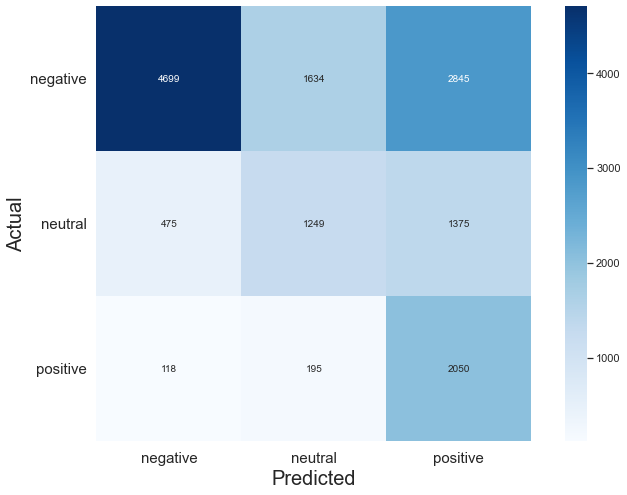

<IPython.core.display.Javascript object>

In [109]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = metrics.confusion_matrix(
    tweets_data["airline_sentiment"].tolist(), tweets_data["VADER_pred"].tolist()
)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=0.002,
    fmt="d",
    square=True,
    ax=ax,
    cmap="Blues",
    linecolor="black",
    xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"],
)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
ax.set_ylabel("Actual", fontsize=20)
ax.set_xlabel("Predicted", fontsize=20)
plt.show()

#### D. TextBlob

In [110]:
tweets_data_new = (
    tweets_data.copy()
)  # make a copy of dataframe and do unsupervised operations on that dataframe

<IPython.core.display.Javascript object>

In [111]:
# Calculate the polarity score of the reviews
tweets_data_new["polarity"] = tweets_data_new["text"].apply(
    lambda text: TextBlob(text).sentiment.polarity
)

tweets_data_new.head()

,text,airline_sentiment,VADER_pred,polarity
0,say,neutral,neutral,0.00
1,plus add commercials experience tacky,positive,neutral,0.00
2,not today must mean need take another trip,neutral,neutral,-0.31
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,negative,0.01
4,really big bad thing,negative,negative,-0.35


<IPython.core.display.Javascript object>

In [112]:
# Classify the class of the review by keeping threshold on the polarity score
tweets_data_new["polarity_score"] = tweets_data_new["polarity"].apply(
    lambda c: "positive" if c > 0 else "neutral" if c == 0 else "negative"
)

tweets_data_new.head()

,text,airline_sentiment,VADER_pred,polarity,polarity_score
0,say,neutral,neutral,0.00,neutral
1,plus add commercials experience tacky,positive,neutral,0.00,neutral
2,not today must mean need take another trip,neutral,neutral,-0.31,negative
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,negative,0.01,positive
4,really big bad thing,negative,negative,-0.35,negative


<IPython.core.display.Javascript object>

In [113]:
tweets_data["Text_Blob_pred"] = tweets_data_new["polarity_score"].tolist()
tweets_data.head()

,text,airline_sentiment,VADER_pred,Text_Blob_pred
0,say,neutral,neutral,neutral
1,plus add commercials experience tacky,positive,neutral,neutral
2,not today must mean need take another trip,neutral,neutral,negative
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,negative,positive
4,really big bad thing,negative,negative,negative


<IPython.core.display.Javascript object>

In [114]:
print(
    "Accuaracy of using Text Blob Sentiment Analysis is : ",
    metrics.accuracy_score(
        tweets_data["airline_sentiment"].tolist(),
        tweets_data["Text_Blob_pred"].tolist(),
    ),
)

Accuaracy of using Text Blob Sentiment Analysis is :  0.42827868852459017


<IPython.core.display.Javascript object>

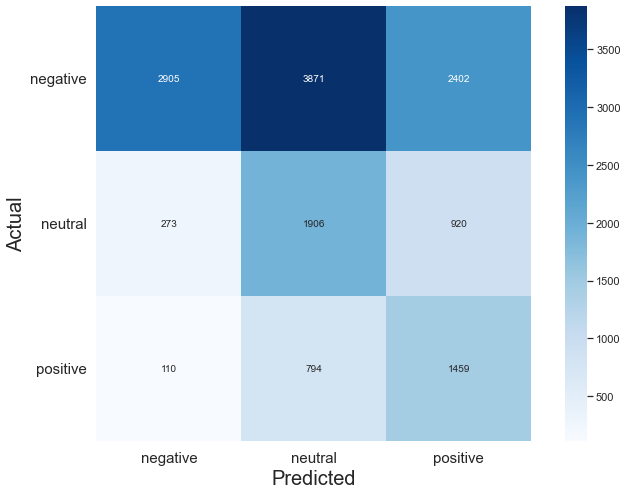

<IPython.core.display.Javascript object>

In [115]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = metrics.confusion_matrix(
    tweets_data["airline_sentiment"].tolist(), tweets_data["Text_Blob_pred"].tolist()
)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=0.002,
    fmt="d",
    square=True,
    ax=ax,
    cmap="Blues",
    linecolor="black",
    xticklabels=["negative", "neutral", "positive"],
    yticklabels=["negative", "neutral", "positive"],
)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
ax.set_ylabel("Actual", fontsize=20)
ax.set_xlabel("Predicted", fontsize=20)
plt.show()

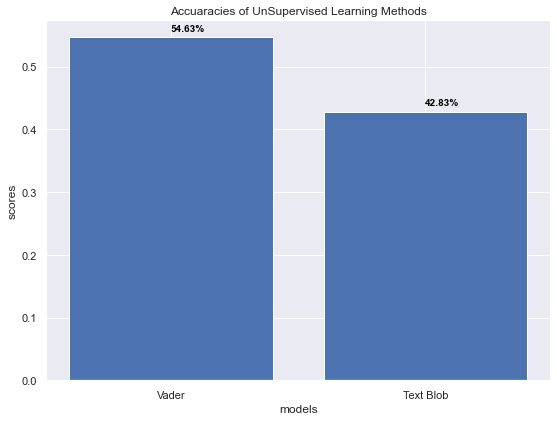

<IPython.core.display.Javascript object>

In [116]:
# plot the accuaracies of the text blob and Vader

fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
subjects = ["Vader", "Text Blob"]
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [
    metrics.accuracy_score(
        tweets_data["airline_sentiment"].tolist(), tweets_data["VADER_pred"].tolist()
    ),
    metrics.accuracy_score(
        tweets_data["airline_sentiment"].tolist(),
        tweets_data["Text_Blob_pred"].tolist(),
    ),
]
ax.bar(subjects, scores)
ax.set_ylabel("scores", fontsize=12)  # y-axis labels
ax.set_xlabel("models", fontsize=12)  # x-axis labels
ax.set_title("Accuaracies of UnSupervised Learning Methods")  # tittle of the graph
for i, v in enumerate(scores):
    ax.text(i, v + 0.01, "{:.2f}%".format(100 * v), color="black", fontweight="bold")
    # plt.savefig("barplot_1.png", dpi=100, format="png", bbox_inches="tight")
plt.show()

#### Observation:

- **Here, VADER works better than TextBlob because VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage.**

### 8. Conclusion and Key Takeaways<a id='8. Conclusion and key takeaways'></a>

### Conclusion:
- Dataset has **tweets in text format**
- There were lot of **missing values in few columns**
- The goal was to **build a model for sentiment-classification**.
- Data was **imbalanced and class weights were applied** in RandomForest classifier
- **Pre-processed the data** using various techniques and libraries to remove special characters, stopwords etc. **It helped in getting a good accuracy in predictions**
- **Created a Word Cloud plot** based on summary and high and low score.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- Trained the model, validated against validation data and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, **predicted the results for the test data.**
- Using the above techniques, **TF-IDF model performed well** in perspective of how sentiment classification models perform.
- However, **accuracy of model can be improved by increasing the dataset for the model building**  
- Also, **max_feature parameter** can be increased in the vectorizer. 
- **Other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** can be tried to increase the overall accuracy even further.

### Best Model Performance Observations:

- Supervised techniques such as CountVectorizer and TF-IDF Vectorizer were tried
- Best model is with **TF-IDF Vectorization**
- We can observe from the confusion matrix of all the models that model build using TF-IDF Vectorization was the best model because it predicted the majority of the classes better than the other models.
- The test accuracy of this model is **81%** in validation set and **80%** in test set.
- Unsupervised techniques such as VADER and TextBlob were tried for sentiment analysis
- However, VADER and TextBlob didnt produce good accuracy

### Key Takeaways:

- Working on Encoding text data using Count Vectorizer and TF-IDF and  classifying them using Machine learning models.
- Working on Unsupervised learning methods using Python packages for Sentiment Analysis like VADER sentiment analysis and TextBlob.
- Comparing the Machine learning models' performance with Sentiment Analysis using Python packages to check which one gave better and more accurate results.
- Most of the users had tweeted "negative" sentiments for airlines "United", "US Airways" and "American. There is a large difference between count of "negative" sentiments against other sentiments.
- Users of airline "Southwest" and "Delta" also had more "negative" sentiment tweets. However, count different with other sentiments are not too large
- Airline "Virgin America" has all three sentiments with almost similar counts
- Most of the users had reported "Customer Service Issue" as most frequent negative sentiment reason for airlines "United", "US Airways", "American" and "Southwest". There is a large difference between count of these "negative" sentiments against other sentiments.
- Users of airline "Delta" had reported "Late Flight" as most frequent negative sentiment reason.
- Airline "Virgin America" has all negative reasons with almost similar counts